In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as pt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
#function to return the y values for a given grade and test
def yVal(year, test, g):
  
  #determines which year's dataframe to use
  if year == 2016:
    df = leap16vis
  elif year == 2017:
    df = leap17vis
  elif year == 2018:
    df = leap18vis
  elif year == 2019:
    df = leap19vis
  else:
    print("You must enter a valid year: 2016, 2017, 2018, or 2019")

  # creates a smaller Dataframe containing only grade g data
  gdf = df[(df['Grade'] == g)]
  if (test == 'ELA'):
    yval = gdf['ELA-Gap'] #returns ELA-Gap values for grade g
  elif (test == 'Math'):
    yval = gdf['Math-Gap'] #returns Math-Gap values for grade g
  else:
    print("You must enter 'ELA' or 'Math'") # returns an error message of the correct test name isn't given
  return yval

In [5]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2016 Data

## Importing the Data

In [6]:
link2016 = 'https://drive.google.com/file/d/1d-j489nLSjuMI8bVkZ4RuZYCdMPEswz_/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1d-j489nLSjuMI8bVkZ4RuZYCdMPEswz_'}) 
downloaded.GetContentFile('2016LEAP-subgroups.csv')  
leap16 = pd.read_csv('2016LEAP-subgroups.csv')

## Cleaning up the Data

In [7]:
# replacing non-numeric values
leap16 = leap16.replace(to_replace = '≤5', value = 2.5)
leap16 = leap16.replace(to_replace = '≥95', value = 97.5)

In [8]:
# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap16.drop(leap16[leap16['ELAAdvanced'] == 'NR'].index, inplace = True)
leap16.drop(leap16[leap16['MathAdvanced'] == 'NR'].index, inplace = True)

In [9]:
# convert all score data to numerica values
# I'm going to get rid of all the scores but ELA and Math Mastery so I'm not bothering to change the others

# ELA Scores
leap16["ELAMastery"] = pd.to_numeric(leap16["ELAMastery"])

# Math Scores
leap16["MathMastery"] = pd.to_numeric(leap16["MathMastery"])

## Dividing up the data: Statewide vs. Parishes

In [10]:
# Separate out Statewide data for analysis of gaps later
leap16st = leap16[leap16["SchoolSystemName"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap16p = leap16[leap16["SchoolSystemName"] != 'Louisiana Statewide']

In [11]:
leap16p.head()

,SchoolSystemName,SchoolCode,Grade,Subgroup,ELAAdvanced,ELAMastery,ELABasic,ELAApproachingBasic,ELAUnsatisfactory,MathAdvanced,MathMastery,MathBasic,MathApproachingBasic,MathUnsatisfactory
68,Acadia Parish,NaN,3,Black or African American,2.5,26.0,25,26,21,2.5,39.0,34,16,7
69,Acadia Parish,NaN,3,Economically Disadvantaged,2.5,34.0,29,22,12,8,47.0,28,12,2.5
70,Acadia Parish,NaN,3,English Learner,2.5,30.0,20,30,20,2.5,30.0,50,20,2.5
71,Acadia Parish,NaN,3,Hispanic/Latino,2.5,29.0,36,21,11,11,41.0,37,7,2.5
73,Acadia Parish,NaN,3,Students with Disability,2.5,15.0,13,24,47,2.5,22.0,16,33,25


In [12]:
SDleap16p = leap16p.groupby(['Grade', 'Subgroup']).std()

In [13]:
SDleap16p.head()

# isolate the total populations from each parish
#leap16p = leap16p[leap16p['Subgroup']=="Total Population"]

# need to group by grade then calculate the standard deviation


ELAMastery  MathMastery
Grade Subgroup                                                 
3     American Indian or Alaska Native   15.564918    14.114919
      Asian                              15.673244    17.277493
      Black or African American          14.132528    14.331596
      Economically Disadvantaged         14.477849    13.647730
      English Learner                    12.113680    13.469796

## Preping Data for Visualization

In [14]:
# the names are too long for charts
leap16st = leap16st.replace(to_replace = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Economically Disadvantaged', 'English Learner', 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'Students with Disability', 'Total Population', 'Two or more races', 'White'], 
                            value = ['AI/AN','AS', 'BK', 'ED', 'ELL', 'HL', 'NH/PI', 'Dis', 'TotPop', 'MR', 'WH'])

In [15]:
# get rid of extra Columns to make visualization easier
leap16vis = leap16st.drop(columns = ['SchoolSystemName', 'SchoolCode', 'ELAAdvanced', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathAdvanced', 'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])

# separate out racial data from other categories
# race categories
leap16Race = leap16vis[(leap16vis.Subgroup == 'TotPop') | (leap16vis.Subgroup == 'AI/AN') | (leap16vis.Subgroup == 'AS') | (leap16vis.Subgroup == 'BK') | (leap16vis.Subgroup == 'HL') | (leap16vis.Subgroup == 'MR') | (leap16vis.Subgroup == 'NH/PI') | (leap16vis.Subgroup == 'WH')]

# other categories
leap16Cat = leap16vis[(leap16vis.Subgroup == 'TotPop') | (leap16vis.Subgroup == 'ED') | (leap16vis.Subgroup == 'Dis') | (leap16vis.Subgroup == 'ELL')]

### Checking for Outliers

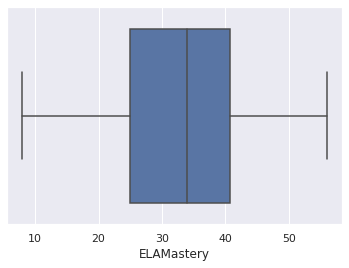

In [16]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap16st['ELAMastery']);

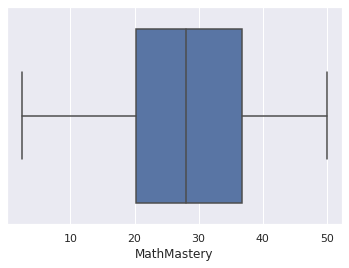

In [17]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap16st['MathMastery']);

## Visualizations of Statewide Data

### Distributions of ELA & Math Mastery By Subgroup

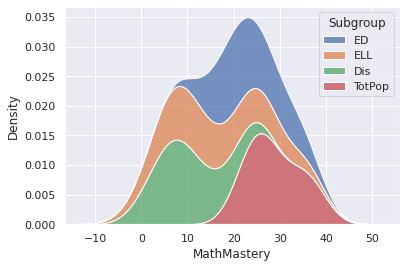

In [18]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap16Cat, x="MathMastery", hue="Subgroup", multiple="stack");

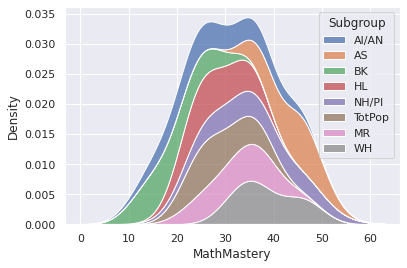

In [19]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap16Race, x="MathMastery", hue="Subgroup", multiple="stack");

## LEAP Performance Gaps

### Calculating the Gaps

In [20]:
# find the locations of the Total Populations for each grade
print(leap16vis[leap16vis['Subgroup']=='TotPop'].index.values)

[ 8 19 30 41 52 63]


In [21]:
conditions = [(leap16vis['Grade'] == 3),
              (leap16vis['Grade'] == 4),
              (leap16vis['Grade'] == 5),
              (leap16vis['Grade'] == 6),
              (leap16vis['Grade'] == 7),
              (leap16vis['Grade'] == 8)]
values = [(leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[8]),
          (leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[19]),
          (leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[30]),
          (leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[41]),
          (leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[52]),
          (leap16vis['ELAMastery'] - leap16vis['ELAMastery'].loc[63])]
leap16vis['ELA-Gap'] = np.select(conditions, values)

In [22]:
conditions = [(leap16vis['Grade'] == 3),
              (leap16vis['Grade'] == 4),
              (leap16vis['Grade'] == 5),
              (leap16vis['Grade'] == 6),
              (leap16vis['Grade'] == 7),
              (leap16vis['Grade'] == 8)]
values = [(leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[8]),
          (leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[19]),
          (leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[30]),
          (leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[41]),
          (leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[52]),
          (leap16vis['MathMastery'] - leap16vis['MathMastery'].loc[63])]
leap16vis['Math-Gap'] = np.select(conditions, values)

In [23]:
leap16vis.head(15)

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap
0,3,AI/AN,30.0,39.0,-4.0,2.0
1,3,AS,51.0,45.0,17.0,8.0
2,3,BK,23.0,28.0,-11.0,-9.0
3,3,ED,27.0,33.0,-7.0,-4.0
4,3,ELL,18.0,29.0,-16.0,-8.0
5,3,HL,28.0,35.0,-6.0,-2.0
6,3,NH/PI,44.0,46.0,10.0,9.0
7,3,Dis,15.0,20.0,-19.0,-17.0
8,3,TotPop,34.0,37.0,0.0,0.0
9,3,MR,40.0,38.0,6.0,1.0


### Visualizaing the Performance Gap by Subgroup

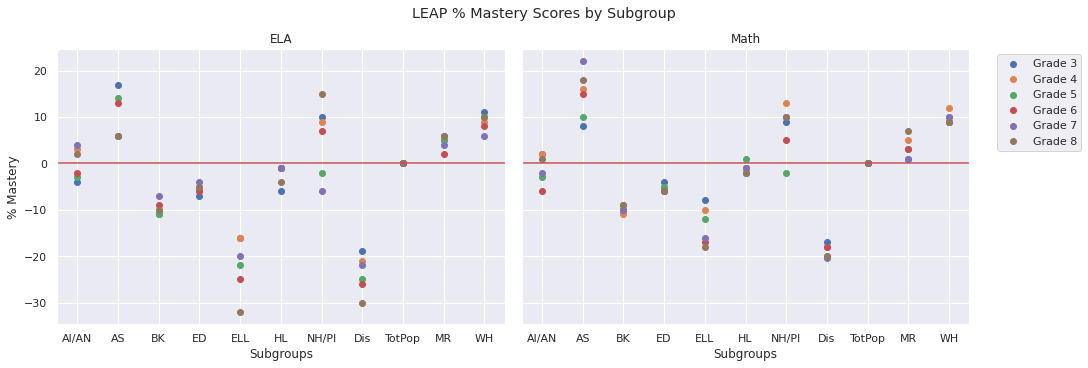

In [24]:
# Plotting the Gaps

# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leap16vis[(leap16vis['Grade'] == 3)]
x = g3['Subgroup']

#setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(15,5), constrained_layout = True)
fig.suptitle('LEAP % Mastery Scores by Subgroup');

# ELA Plot Values & Parameters
for g in range(3,9):
  ax1.scatter(x, yVal(2016, 'ELA', g), label = ('Grade ' + str(g)));
ax1.set(xlabel='Subgroups', ylabel='% Mastery');
ax1.label_outer();
ax1.set_title('ELA');
ax1.axhline(y = 0, color = 'r', linestyle = '-');

#Math Plot Values & Parameters
for g in range(3,9):
  ax2.scatter(x, yVal(2016, 'Math', g), label = ('Grade ' + str(g)));
ax2.label_outer();
ax2.set(xlabel='Subgroups');
ax2.set_title('Math');
ax2.axhline(y = 0, color = 'r', linestyle = '-');
plt.legend(bbox_to_anchor=(1.05, 1));

# 2017 Data

## Importing the Data

In [25]:
link2017 = 'https://drive.google.com/file/d/1YR_kvjpHrpUikxzyvtn5-GcckzVI7oKL/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1YR_kvjpHrpUikxzyvtn5-GcckzVI7oKL'}) 
downloaded.GetContentFile('2017LEAP-subgroups.csv')  
leap17 = pd.read_csv('2017LEAP-subgroups.csv')

## Cleaning up the Data

In [26]:
# replacing non-numeric values
leap17 = leap17.replace(to_replace = '≤5', value = 2.5)
leap17 = leap17.replace(to_replace = '<5', value = 2.5)
leap17 = leap17.replace(to_replace = '≥95', value = 97.5)
leap17 = leap17.replace(to_replace = '>95', value = 97.5)

# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap17.drop(leap17[leap17['ELAAdvanced'] == 'NR'].index, inplace = True)
leap17.drop(leap17[leap17['MathAdvanced'] == 'NR'].index, inplace = True)

'''
These are the unique Subgroups provided by the state for the 2017 Data:
'Total Population', 'Male', 'Female', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Regular Education',
       'Students with Disability',
       'Regular Education and Section 504 - Yes',
       'Regular Education and Section 504 - No', 'English Learner',
       'Not English Learner', 'Migrant', 'Not Migrant',
       'Economically Disadvantaged', 'Not Economically Disadvantaged',
       'Homeless', 'Not Homeless'], dtype=object)
'''


# since the first two years of data did not contain these subgroups, I am going to remove them
leap17.drop(leap17[leap17['Subgroup'] == 'Male'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Female'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Regular Education'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Regular Education and Section 504 - Yes'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Regular Education and Section 504 - No'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Not English Learner'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Migrant'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Not Migrant'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Not Economically Disadvantaged'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Homeless'].index, inplace = True)
leap17.drop(leap17[leap17['Subgroup'] == 'Not Homeless'].index, inplace = True)

# convert all score data to numerica values
# I'm going to get rid of all the scores but ELA and Math Mastery so I'm not bothering to change the others

# ELA Scores
leap17["ELAMastery"] = pd.to_numeric(leap17["ELAMastery"])

# Math Scores
leap17["MathMastery"] = pd.to_numeric(leap17["MathMastery"])

## Dividing up the data: Statewide vs. Parishes

In [27]:
# Separate out Statewide data for analysis of gaps later
leap17st = leap17[leap17["SchoolSystemName"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap17p = leap17[leap17["SchoolSystemName"] != 'Louisiana Statewide']

# isolate the total populations from each parish
leap17p = leap17p[leap17p['Subgroup']=="Total Population"]

# need to group by grade then calculate the standard deviation
SDleap17p = leap17p.groupby('Grade').std()

## Preping Data for Visualization

In [28]:
leap17st.Subgroup.unique()

array(['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Students with Disability', 'English Learner',
       'Economically Disadvantaged'], dtype=object)

In [29]:
# the names are too long for charts
leap17st = leap17st.replace(to_replace = ['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Students with Disability', 'English Learner',
       'Economically Disadvantaged'], 
                            value = ['TotPop','HL', 'AI/AN', 'AS', 'BK', 'NH/PI', 'WH', 'MR', 'Dis', 'ELL', 'ED'])

# get rid of extra Columns to make visualization easier
leap17vis = leap17st.drop(columns = ['SchoolSystemName', 'ELAAdvanced', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathAdvanced', 'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])

# separate out racial data from other categories
# race categories
leap17Race = leap17vis[(leap17vis.Subgroup == 'TotPop') | (leap17vis.Subgroup == 'AI/AN') | (leap17vis.Subgroup == 'AS') | (leap17vis.Subgroup == 'BK') | (leap17vis.Subgroup == 'HL') | (leap17vis.Subgroup == 'MR') | (leap17vis.Subgroup == 'NH/PI') | (leap17vis.Subgroup == 'WH')]

# other categories
leap17Cat = leap17vis[(leap17vis.Subgroup == 'TotPop') | (leap17vis.Subgroup == 'ED') | (leap17vis.Subgroup == 'Dis') | (leap17vis.Subgroup == 'ELL')]

### Checking for Outliers

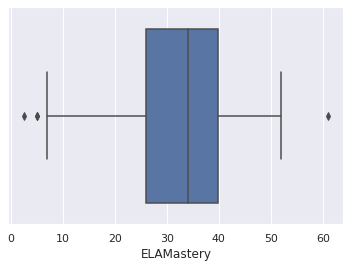

In [30]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap17st['ELAMastery']);

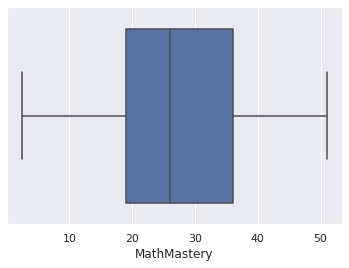

In [31]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap17st['MathMastery']);

## Visualizations of Statewide Data

### Distributions of ELA & Math Mastery By Subgroup

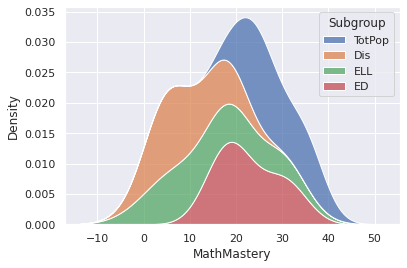

In [32]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap17Cat, x="MathMastery", hue="Subgroup", multiple="stack");

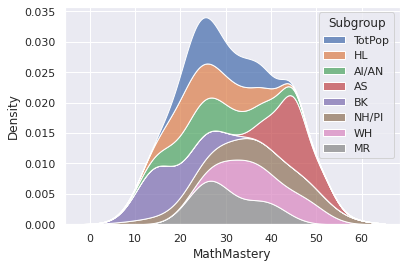

In [33]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap17Race, x="MathMastery", hue="Subgroup", multiple="stack");

## LEAP Performance Gaps

### Calculating the Gaps

In [34]:
# find the locations of the Total Populations for each grade
print(leap17vis[leap17vis['Subgroup']=='TotPop'].index.values)

[  0  22  44  66  88 110]


In [35]:
conditions = [(leap17vis['Grade'] == 3),
              (leap17vis['Grade'] == 4),
              (leap17vis['Grade'] == 5),
              (leap17vis['Grade'] == 6),
              (leap17vis['Grade'] == 7),
              (leap17vis['Grade'] == 8)]
values = [(leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[0]),
          (leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[22]),
          (leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[44]),
          (leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[66]),
          (leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[88]),
          (leap17vis['ELAMastery'] - leap17vis['ELAMastery'].loc[110])]
leap17vis['ELA-Gap'] = np.select(conditions, values)

conditions = [(leap17vis['Grade'] == 3),
              (leap17vis['Grade'] == 4),
              (leap17vis['Grade'] == 5),
              (leap17vis['Grade'] == 6),
              (leap17vis['Grade'] == 7),
              (leap17vis['Grade'] == 8)]
values = [(leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[0]),
          (leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[22]),
          (leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[44]),
          (leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[66]),
          (leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[88]),
          (leap17vis['MathMastery'] - leap17vis['MathMastery'].loc[110])]
leap17vis['Math-Gap'] = np.select(conditions, values)

In [36]:
leap17vis.head(15)

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap
0,3,TotPop,39.0,36.0,0.0,0.0
3,3,HL,34.0,36.0,-5.0,0.0
4,3,AI/AN,45.0,40.0,6.0,4.0
5,3,AS,48.0,46.0,9.0,10.0
6,3,BK,28.0,26.0,-11.0,-10.0
7,3,NH/PI,49.0,48.0,10.0,12.0
8,3,WH,50.0,47.0,11.0,11.0
9,3,MR,45.0,40.0,6.0,4.0
11,3,Dis,19.0,19.0,-20.0,-17.0
14,3,ELL,21.0,29.0,-18.0,-7.0


### Visualizaing the Performance Gap by Subgroup

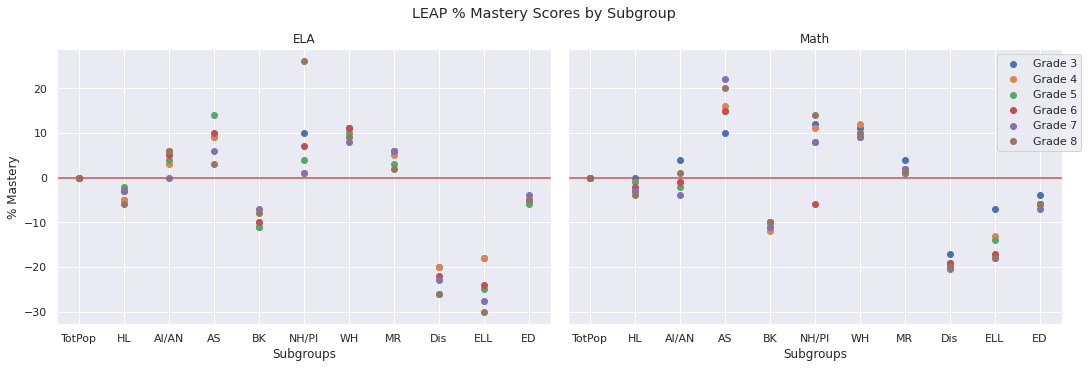

In [37]:
# Plotting the Gaps

# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leap17vis[(leap17vis['Grade'] == 3)]
x = g3['Subgroup']

#setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(15,5), constrained_layout = True)
fig.suptitle('LEAP % Mastery Scores by Subgroup');

# ELA Plot Values & Parameters
for g in range(3,9):
  ax1.scatter(x, yVal(2017, 'ELA', g), label = ('Grade ' + str(g)));
ax1.set(xlabel='Subgroups', ylabel='% Mastery');
ax1.label_outer();
ax1.set_title('ELA');
ax1.axhline(y = 0, color = 'r', linestyle = '-');

#Math Plot Values & Parameters
for g in range(3,9):
  ax2.scatter(x, yVal(2017, 'Math', g), label = ('Grade ' + str(g)));
ax2.label_outer();
ax2.set(xlabel='Subgroups');
ax2.set_title('Math');
ax2.axhline(y = 0, color = 'r', linestyle = '-');
plt.legend(bbox_to_anchor=(1.05, 1));

# 2018 Data

## Importing the Data

In [38]:
link2018 = 'https://drive.google.com/file/d/1Gqe8HWekaR28Br7rI-ej7clxpKwYGmDV/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1Gqe8HWekaR28Br7rI-ej7clxpKwYGmDV'}) 
downloaded.GetContentFile('2018LEAP-subgroups.csv')  
leap18 = pd.read_csv('2018LEAP-subgroups.csv')

## Cleaning up the Data

In [39]:
# replacing non-numeric values
leap18 = leap18.replace(to_replace = '≤5', value = 2.5)
leap18 = leap18.replace(to_replace = '<5', value = 2.5)
leap18 = leap18.replace(to_replace = '≥95', value = 97.5)
leap18 = leap18.replace(to_replace = '>95', value = 97.5)

# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap18.drop(leap18[leap18['ELAAdvanced'] == 'NR'].index, inplace = True)
leap18.drop(leap18[leap18['MathAdvanced'] == 'NR'].index, inplace = True)

# since the first two years of data did not contain these subgroups, I am going to remove them
leap18.drop(leap18[leap18['Subgroup'] == 'Male'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Female'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Regular Education'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Regular Education and Section 504 - Yes'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Regular Education and Section 504 - No'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Non-English Learner'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Migrant'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Non-Migrant'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Not Economically Disadvantaged'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Homeless'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Not Homeless'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Military Affiliation'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'No Military Affiliation'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'Foster Care'].index, inplace = True)
leap18.drop(leap18[leap18['Subgroup'] == 'No Foster Care'].index, inplace = True)

# convert all score data to numerica values
# I'm going to get rid of all the scores but ELA and Math Mastery so I'm not bothering to change the others

# ELA Scores
leap18["ELAMastery"] = pd.to_numeric(leap18["ELAMastery"])

# Math Scores
leap18["MathMastery"] = pd.to_numeric(leap18["MathMastery"])

## Dividing up the data: Statewide vs. Parishes

In [40]:
# Separate out Statewide data for analysis of gaps later
leap18st = leap18[leap18["SchoolSystemName"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap18p = leap18[leap18["SchoolSystemName"] != 'Louisiana Statewide']

# isolate the total populations from each parish
leap18p = leap18p[leap18p['Subgroup']=="Total Population"]

# need to group by grade then calculate the standard deviation
SDleap18p = leap18p.groupby('Grade').std()

## Prepping Data for Visualization

In [41]:
leap18st.Subgroup.unique()

array(['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Students with Disability', 'English Learner',
       'Economically Disadvantaged'], dtype=object)

In [42]:
# the names are too long for charts
leap18st = leap18st.replace(to_replace = ['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or More Races', 'Students with Disability', 'English Learner',
       'Economically Disadvantaged'], 
                            value = ['TotPop','HL', 'AI/AN', 'AS', 'BK', 'NH/PI', 'WH', 'MR', 'Dis', 'ELL', 'ED'])

# get rid of extra Columns to make visualization easier
leap18vis = leap18st.drop(columns = ['SchoolSystemName', 'ELAAdvanced', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathAdvanced', 'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])

# separate out racial data from other categories
# race categories
leap18Race = leap18vis[(leap18vis.Subgroup == 'TotPop') | (leap18vis.Subgroup == 'AI/AN') | (leap18vis.Subgroup == 'AS') | (leap18vis.Subgroup == 'BK') | (leap18vis.Subgroup == 'HL') | (leap18vis.Subgroup == 'MR') | (leap18vis.Subgroup == 'NH/PI') | (leap18vis.Subgroup == 'WH')]

# other categories
leap18Cat = leap18vis[(leap18vis.Subgroup == 'TotPop') | (leap18vis.Subgroup == 'ED') | (leap18vis.Subgroup == 'Dis') | (leap18vis.Subgroup == 'ELL')]

### Checking for Outliers

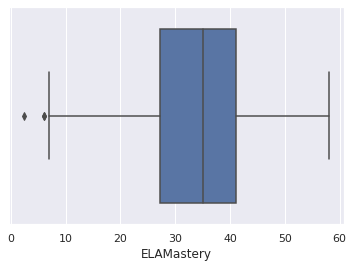

In [43]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap18st['ELAMastery']);

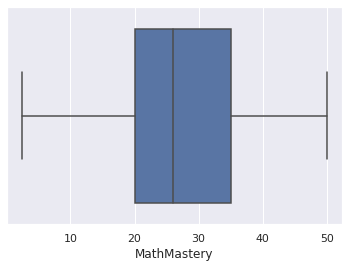

In [44]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap18st['MathMastery']);

## Visualizations of Statewide Data

### Distributions of ELA & Math Mastery By Subgroup

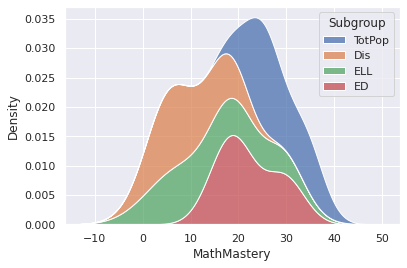

In [45]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap18Cat, x="MathMastery", hue="Subgroup", multiple="stack");

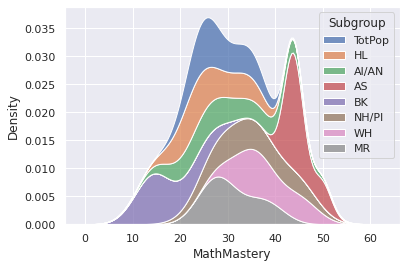

In [46]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap18Race, x="MathMastery", hue="Subgroup", multiple="stack");

## LEAP Performance Gaps

### Calculating the Gaps

In [47]:
# find the locations of the Total Populations for each grade
print(leap18vis[leap18vis['Subgroup']=='TotPop'].index.values)

[  0  26  52  78 104 130]


In [48]:
conditions = [(leap18vis['Grade'] == 3),
              (leap18vis['Grade'] == 4),
              (leap18vis['Grade'] == 5),
              (leap18vis['Grade'] == 6),
              (leap18vis['Grade'] == 7),
              (leap18vis['Grade'] == 8)]
values = [(leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[0]),
          (leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[26]),
          (leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[52]),
          (leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[78]),
          (leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[104]),
          (leap18vis['ELAMastery'] - leap18vis['ELAMastery'].loc[130])]
leap18vis['ELA-Gap'] = np.select(conditions, values)

conditions = [(leap18vis['Grade'] == 3),
              (leap18vis['Grade'] == 4),
              (leap18vis['Grade'] == 5),
              (leap18vis['Grade'] == 6),
              (leap18vis['Grade'] == 7),
              (leap18vis['Grade'] == 8)]
values = [(leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[0]),
          (leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[26]),
          (leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[52]),
          (leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[78]),
          (leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[104]),
          (leap18vis['MathMastery'] - leap18vis['MathMastery'].loc[130])]
leap18vis['Math-Gap'] = np.select(conditions, values)

In [49]:
leap18vis.head(15)

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap
0,3,TotPop,40.0,35.0,0.0,0.0
3,3,HL,35.0,33.0,-5.0,-2.0
4,3,AI/AN,45.0,41.0,5.0,6.0
5,3,AS,49.0,44.0,9.0,9.0
6,3,BK,30.0,25.0,-10.0,-10.0
7,3,NH/PI,37.0,35.0,-3.0,0.0
8,3,WH,50.0,44.0,10.0,9.0
9,3,MR,47.0,39.0,7.0,4.0
11,3,Dis,20.0,18.0,-20.0,-17.0
14,3,ELL,23.0,27.0,-17.0,-8.0


### Visualizaing the Performance Gap by Subgroup

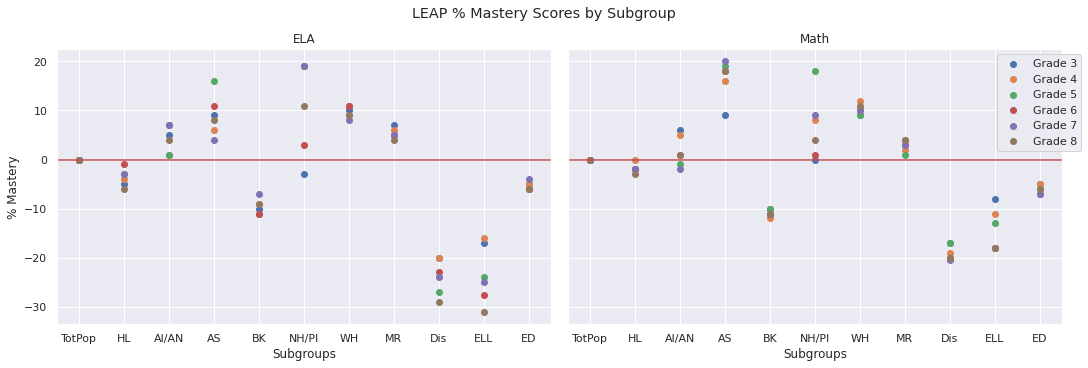

In [50]:
# Plotting the Gaps

# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leap18vis[(leap18vis['Grade'] == 3)]
x = g3['Subgroup']

#setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(15,5), constrained_layout = True)
fig.suptitle('LEAP % Mastery Scores by Subgroup');

# ELA Plot Values & Parameters
for g in range(3,9):
  ax1.scatter(x, yVal(2018, 'ELA', g), label = ('Grade ' + str(g)));
ax1.set(xlabel='Subgroups', ylabel='% Mastery');
ax1.label_outer();
ax1.set_title('ELA');
ax1.axhline(y = 0, color = 'r', linestyle = '-');

#Math Plot Values & Parameters
for g in range(3,9):
  ax2.scatter(x, yVal(2018, 'Math', g), label = ('Grade ' + str(g)));
ax2.label_outer();
ax2.set(xlabel='Subgroups');
ax2.set_title('Math');
ax2.axhline(y = 0, color = 'r', linestyle = '-');
plt.legend(bbox_to_anchor=(1.05, 1));

# 2019 Data

## Importing the Data

In [51]:
link2019 = 'https://drive.google.com/file/d/1CT8osc0isu2SFopM88FpHPWR4itqPCib/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1CT8osc0isu2SFopM88FpHPWR4itqPCib'}) 
downloaded.GetContentFile('2019LEAP-subgroups.csv')  
leap19 = pd.read_csv('2019LEAP-subgroups.csv')

## Cleaning Up the Data

In [52]:
# replacing non-numeric values
leap19 = leap19.replace(to_replace = '≤5', value = 2.5)
leap19 = leap19.replace(to_replace = '<5', value = 2.5)
leap19 = leap19.replace(to_replace = '≥95', value = 97.5)
leap19 = leap19.replace(to_replace = '>95', value = 97.5)

# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap19.drop(leap19[leap19['ELAAdvanced'] == 'NR'].index, inplace = True)
leap19.drop(leap19[leap19['MathAdvanced'] == 'NR'].index, inplace = True)

# since the first two years of data did not contain these subgroups, I am going to remove them
leap19.drop(leap19[leap19['Subgroup'] == 'Male'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Female'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Regular Education'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Regular Education and Section 504 - Yes'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Regular Education and Section 504 - No'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Non-English Learner'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Migrant'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Non-Migrant'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Not Economically Disadvantaged'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Homeless'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Not Homeless'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Military Affiliated'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'No Military Affiliation'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'Foster Care'].index, inplace = True)
leap19.drop(leap19[leap19['Subgroup'] == 'No Foster Care'].index, inplace = True)

# convert all score data to numerica values
# I'm going to get rid of all the scores but ELA and Math Mastery so I'm not bothering to change the others

# ELA Scores
leap19["ELAMastery"] = pd.to_numeric(leap19["ELAMastery"])

# Math Scores
leap19["MathMastery"] = pd.to_numeric(leap19["MathMastery"])

## Dividing up the data: Statewide vs. Parishes

In [53]:
# Separate out Statewide data for analysis of gaps later
leap19st = leap19[leap19["School System Name"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap19p = leap19[leap19["School System Name"] != 'Louisiana Statewide']

# isolate the total populations from each parish
leap19p = leap19p[leap19p['Subgroup']=="Total Population"]

# need to group by grade then calculate the standard deviation
SDleap19p = leap19p.groupby('Grade').std()

In [54]:
SDleap19p.head()

,ELAMastery,MathMastery
Grade,,
3,14.492424,15.066884
4,14.415386,18.744694
5,16.342120,16.829477
6,14.822574,15.120973
7,12.323292,14.840693


## Prepping Data for Visualization

In [55]:
leap19st.Subgroup.unique()

array(['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or more races', 'Students with Disabilities',
       'English Learner', 'Economically Disadvantaged'], dtype=object)

In [56]:
# the names are too long for charts
leap19st = leap19st.replace(to_replace = ['Total Population', 'Hispanic/Latino',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or more races', 'Students with Disabilities', 'English Learner',
       'Economically Disadvantaged'], 
                            value = ['TotPop','HL', 'AI/AN', 'AS', 'BK', 'NH/PI', 'WH', 'MR', 'Dis', 'ELL', 'ED'])

# get rid of extra Columns to make visualization easier
leap19vis = leap19st.drop(columns = ['School System Name', 'ELAAdvanced', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathAdvanced', 'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])

# separate out racial data from other categories
# race categories
leap19Race = leap19vis[(leap19vis.Subgroup == 'TotPop') | (leap19vis.Subgroup == 'AI/AN') | (leap19vis.Subgroup == 'AS') | (leap19vis.Subgroup == 'BK') | (leap19vis.Subgroup == 'HL') | (leap19vis.Subgroup == 'MR') | (leap19vis.Subgroup == 'NH/PI') | (leap19vis.Subgroup == 'WH')]

# other categories
leap19Cat = leap19vis[(leap19vis.Subgroup == 'TotPop') | (leap19vis.Subgroup == 'ED') | (leap19vis.Subgroup == 'Dis') | (leap19vis.Subgroup == 'ELL')]

### Checking for Outliers

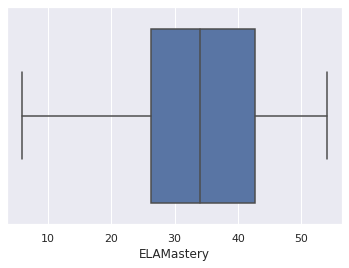

In [57]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap19st['ELAMastery']);

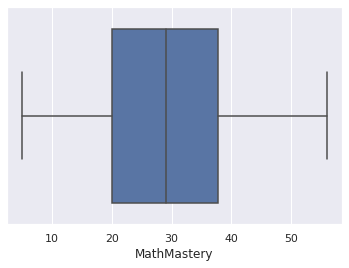

In [58]:
# Check for outliers in Math Mastery data
sns.boxplot(x=leap19st['MathMastery']);

## Visualizations of Statewide Data

### Distributions of ELA & Math Mastery By Subgroup

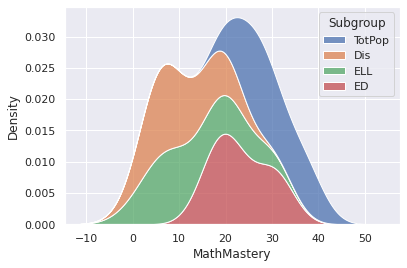

In [59]:
'''
Subgroup abbreviations key:
Dis = Students with a disability
ED = Economically Disadvantaged
ELL = English Language Learners
TotPop = Total Population
'''

sns.kdeplot(data=leap19Cat, x="MathMastery", hue="Subgroup", multiple="stack");

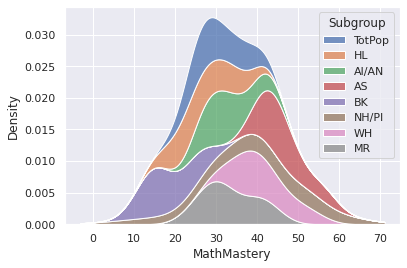

In [60]:
'''
Subgroup abbreviations key:
AI/AN = American Indian or Alaskan Native
AS = Asian
BK = Black or Affican American
HL = Hispanic or Latino
NH/PI = Native Hawaiian or Pacific Islander
TotPop = Total Population
MR = Multi-race
WH = White
'''
sns.kdeplot(data=leap19Race, x="MathMastery", hue="Subgroup", multiple="stack");

## LEAP Performance Gaps

### Calculating the Gaps

In [61]:
# find the locations of the Total Populations for each grade
print(leap19vis[leap19vis['Subgroup']=='TotPop'].index.values)

[ 0 19 38 57 76 95]


In [62]:
conditions = [(leap19vis['Grade'] == 3),
              (leap19vis['Grade'] == 4),
              (leap19vis['Grade'] == 5),
              (leap19vis['Grade'] == 6),
              (leap19vis['Grade'] == 7),
              (leap19vis['Grade'] == 8)]
values = [(leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[0]),
          (leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[19]),
          (leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[38]),
          (leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[57]),
          (leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[76]),
          (leap19vis['ELAMastery'] - leap19vis['ELAMastery'].loc[95])]
leap19vis['ELA-Gap'] = np.select(conditions, values)

conditions = [(leap19vis['Grade'] == 3),
              (leap19vis['Grade'] == 4),
              (leap19vis['Grade'] == 5),
              (leap19vis['Grade'] == 6),
              (leap19vis['Grade'] == 7),
              (leap19vis['Grade'] == 8)]
values = [(leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[0]),
          (leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[19]),
          (leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[38]),
          (leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[57]),
          (leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[76]),
          (leap19vis['MathMastery'] - leap19vis['MathMastery'].loc[95])]
leap19vis['Math-Gap'] = np.select(conditions, values)

In [63]:
leap19vis.head(15)

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap
0,3,TotPop,40.0,36.0,0.0,0.0
3,3,HL,33.0,36.0,-7.0,0.0
4,3,AI/AN,45.0,34.0,5.0,-2.0
5,3,AS,48.0,48.0,8.0,12.0
6,3,BK,29.0,26.0,-11.0,-10.0
7,3,NH/PI,43.0,53.0,3.0,17.0
8,3,WH,51.0,46.0,11.0,10.0
9,3,MR,45.0,41.0,5.0,5.0
11,3,Dis,21.0,20.0,-19.0,-16.0
12,3,ELL,18.0,25.0,-22.0,-11.0


### Visualizaing the Performance Gap by Subgroup

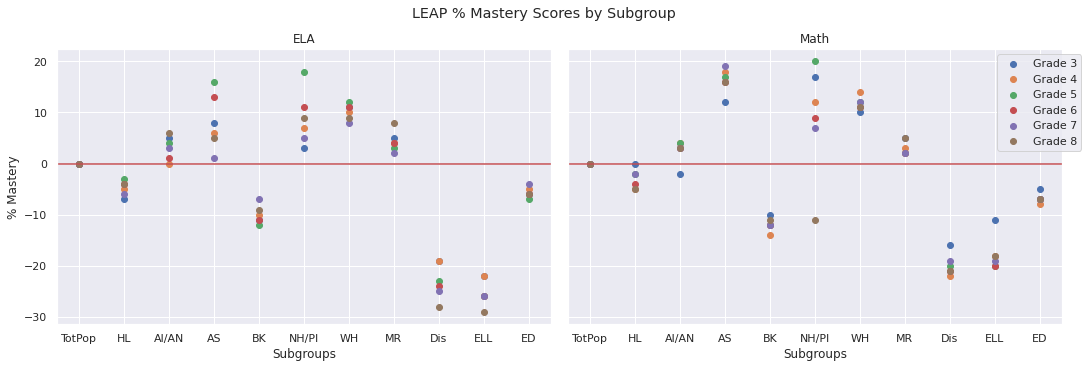

In [64]:
# Plotting the Gaps

# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leap19vis[(leap19vis['Grade'] == 3)]
x = g3['Subgroup']

#setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True, figsize=(15,5), constrained_layout = True)
fig.suptitle('LEAP % Mastery Scores by Subgroup');

# ELA Plot Values & Parameters
for g in range(3,9):
  ax1.scatter(x, yVal(2019, 'ELA', g), label = ('Grade ' + str(g)));
ax1.set(xlabel='Subgroups', ylabel='% Mastery');
ax1.label_outer();
ax1.set_title('ELA');
ax1.axhline(y = 0, color = 'r', linestyle = '-');

#Math Plot Values & Parameters
for g in range(3,9):
  ax2.scatter(x, yVal(2019, 'Math', g), label = ('Grade ' + str(g)));
ax2.label_outer();
ax2.set(xlabel='Subgroups');
ax2.set_title('Math');
ax2.axhline(y = 0, color = 'r', linestyle = '-');
plt.legend(bbox_to_anchor=(1.05, 1));

# 2015 Data

In [65]:
link2015 = 'https://drive.google.com/file/d/1tZrq6knxxNexKWfJxvbfEbkMwzyz_Qku/view?usp=sharing'

downloaded = drive.CreateFile({'id':'1tZrq6knxxNexKWfJxvbfEbkMwzyz_Qku'}) 
downloaded.GetContentFile('2015LEAP-subgroups.csv')  
leap15 = pd.read_csv('2015LEAP-subgroups.csv')

In [66]:
leap15 = leap15.replace(to_replace = '≤5', value = 2.5)
leap15 = leap15.replace(to_replace = '≥95', value = 97.5)

# deleting rows or parish data that did not divide by subgroups (contained NR for all scores instead)
leap15.drop(leap15[leap15['ELAAdvanced'] == 'NR'].index, inplace = True)
leap15.drop(leap15[leap15['MathAdvanced'] == 'NR'].index, inplace = True)

# there are leading spaces in two of the column headings; this renames those
leap15 = leap15.rename(columns = {' MathMastery': 'MathMastery', ' MathApproachingBasic': 'MathApproachingBasic'}, inplace = False)

# convert Mastery score data to numerica values
# ELA Scores
leap15["ELAMastery"] = pd.to_numeric(leap15["ELAMastery"])

# Math Scores
leap15["MathMastery"] = pd.to_numeric(leap15["MathMastery"])

# Separate out Statewide data for analysis of gaps later
leap15st = leap15[leap15["SchoolSystemName"] == 'Louisiana Statewide']

# want to get parish data only to generate standard deviations to use for statewide data
leap15p = leap15[leap15["SchoolSystemName"] != 'Louisiana Statewide']

# isolate the total populations from each parish
leap15p = leap15p[leap15p['Subgroup']=="Total Population"]

# need to group by grade then calculate the standard deviation
SDleap15p = leap15p.groupby('Grade').std()

# the names are too long for charts
leap15st = leap15st.replace(to_replace = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Economically Disadvantaged', 'English Learner', 'Hispanic/Latino', 'Native Hawaiian or Other Pacific Islander', 'Students with Disability', 'Total Population', 'Two or more races', 'White'], 
                            value = ['AI/AN','AS', 'BK', 'ED', 'ELL', 'HL', 'NH/PI', 'Dis', 'TotPop', 'MR', 'WH'])

# get rid of extra Columns to make visualization easier
leap15vis = leap15st.drop(columns = ['SchoolSystemName', 'ELABasic',	'ELAApproachingBasic',	'ELAUnsatisfactory',
                                     'MathBasic',	'MathApproachingBasic',	'MathUnsatisfactory'])
# dropping the Advanced categories
leap15vis = leap15vis.drop(columns = ['ELAAdvanced', 'MathAdvanced'])

# separate out racial data from other categories
# race categories
leap15Race = leap15vis[(leap15vis.Subgroup == 'TotPop') | (leap15vis.Subgroup == 'AI/AN') | (leap15vis.Subgroup == 'AS') | (leap15vis.Subgroup == 'BK') | (leap15vis.Subgroup == 'HL') | (leap15vis.Subgroup == 'MR') | (leap15vis.Subgroup == 'NH/PI') | (leap15vis.Subgroup == 'WH')]

# other categories
leap15Cat = leap15vis[(leap15vis.Subgroup == 'TotPop') | (leap15vis.Subgroup == 'ED') | (leap15vis.Subgroup == 'Dis') | (leap15vis.Subgroup == 'ELL')]

# Calculating the Gaps
# ELA
conditions = [(leap15vis['Grade'] == 3),
              (leap15vis['Grade'] == 4),
              (leap15vis['Grade'] == 5),
              (leap15vis['Grade'] == 6),
              (leap15vis['Grade'] == 7),
              (leap15vis['Grade'] == 8)]
values = [(leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[8]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[19]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[30]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[41]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[52]),
          (leap15vis['ELAMastery'] - leap15vis['ELAMastery'].loc[63])]
leap15vis['ELA-Gap'] = np.select(conditions, values)

# Math
conditions = [(leap15vis['Grade'] == 3),
              (leap15vis['Grade'] == 4),
              (leap15vis['Grade'] == 5),
              (leap15vis['Grade'] == 6),
              (leap15vis['Grade'] == 7),
              (leap15vis['Grade'] == 8)]
values = [(leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[8]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[19]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[30]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[41]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[52]),
          (leap15vis['MathMastery'] - leap15vis['MathMastery'].loc[63])]
leap15vis['Math-Gap'] = np.select(conditions, values)

# Combining Gap Data Over Time

In [67]:
leap15vis['Year'] = 2015
leap15vis.head()

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap,Year
0,3,AI/AN,35.0,29.0,0.0,-2.0,2015
1,3,AS,51.0,42.0,16.0,11.0,2015
2,3,BK,24.0,22.0,-11.0,-9.0,2015
3,3,ED,28.0,26.0,-7.0,-5.0,2015
4,3,ELL,19.0,25.0,-16.0,-6.0,2015


In [68]:
leap16vis['Year'] = 2016
leap17vis['Year'] = 2017
leap18vis['Year'] = 2018
leap19vis['Year'] = 2019

In [69]:
leapAll = pd.concat([leap15vis, leap16vis, leap17vis, leap18vis, leap19vis])
leapAll.tail()

,Grade,Subgroup,ELAMastery,MathMastery,ELA-Gap,Math-Gap,Year
103,8,WH,46.0,37.0,9.0,11.0,2019
104,8,MR,45.0,31.0,8.0,5.0,2019
106,8,Dis,9.0,5.0,-28.0,-21.0,2019
107,8,ELL,8.0,8.0,-29.0,-18.0,2019
109,8,ED,31.0,19.0,-6.0,-7.0,2019


In [70]:
leapAll = leapAll.drop(columns = ['ELAMastery', 'MathMastery'])

# race categories
leapAllRace = leapAll[(leapAll.Subgroup == 'TotPop') | (leapAll.Subgroup == 'AI/AN') | (leapAll.Subgroup == 'AS') | (leapAll.Subgroup == 'BK') | (leapAll.Subgroup == 'HL') | (leapAll.Subgroup == 'MR') | (leapAll.Subgroup == 'NH/PI') | (leapAll.Subgroup == 'WH')]

# other categories
leapAllCat = leapAll[(leapAll.Subgroup == 'TotPop') | (leapAll.Subgroup == 'ED') | (leapAll.Subgroup == 'Dis') | (leapAll.Subgroup == 'ELL')]

In [71]:
# generating xvalues
# use the same x for all y (the choice of grade 3 subgroup labels is arbitrary)
g3 = leapAllRace[(leapAllRace['Grade'] == 3)]
g3R = g3[(g3['Subgroup'] == 'BK')]
x = g3R['Year']

In [72]:
leapAllRace.Subgroup.unique()

array(['AI/AN', 'AS', 'BK', 'HL', 'NH/PI', 'TotPop', 'MR', 'WH'],
      dtype=object)

In [73]:
leapAllCat.Subgroup.unique()

array(['ED', 'ELL', 'Dis', 'TotPop'], dtype=object)

In [74]:
races = ['AI/AN', 'AS', 'BK', 'HL', 'NH/PI', 'MR', 'WH']
otherCat = ['ED', 'ELL', 'Dis']

In [75]:
# create a function to return y values with grade and dataframe input
# with a proper southern name ;-)

def yall(data, subg, g, test):
  # category determines which dataframe to use
  if data == "Race":
    df = leapAllRace
  elif data == "Cat":
    df = leapAllCat
  else:
    print("You must enter a valid catergory: Race or Cat")

  # creates a smaller Dataframe containing only grade g data
  gdf = df[(df['Grade'] == g)]

  # creates a smaller dataframe containing only one subgroup for grade g data
  gdfS = gdf[(gdf['Subgroup'] == subg)]

  if (test == 'ELA'):
    yall = gdfS['ELA-Gap'] #returns ELA-Gap values for grade g and subgroup subg
  elif (test == 'Math'):
    yall = gdfS['Math-Gap'] #returns Math-Gap values for grade g and subgroup subg
  else:
    print("You must enter 'ELA' or 'Math'") # returns an error message of the correct test name isn't given
  return yall

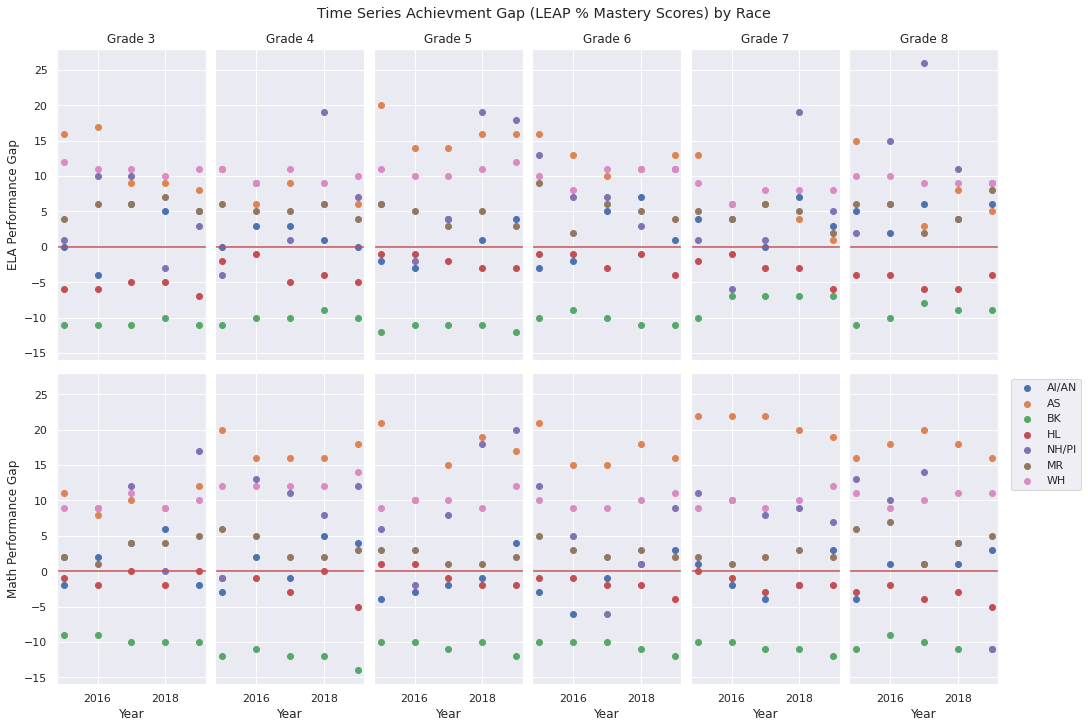

In [83]:
fig, axs = plt.subplots(2, 6, sharex = True, sharey = True, figsize=(15,10), constrained_layout = True)
fig.suptitle('Time Series Achievment Gap (LEAP % Mastery Scores) by Race');

# generating ELA y values
for r in races:
  axs[0, 0].scatter(x, yall('Race', r, 3, 'ELA'), label = r);
for r in races:
  axs[0, 1].scatter(x, yall('Race', r, 4, 'ELA'), label = r);
for r in races:
  axs[0, 2].scatter(x, yall('Race', r, 5, 'ELA'), label = r);
for r in races:
  axs[0, 3].scatter(x, yall('Race', r, 6, 'ELA'), label = r);
for r in races:
  axs[0, 4].scatter(x, yall('Race', r, 7, 'ELA'), label = r);
for r in races:
  axs[0, 5].scatter(x, yall('Race', r, 8, 'ELA'), label = r);

# generating Math y values
for r in races:
  axs[1, 0].scatter(x, yall('Race', r, 3, 'Math'), label = r);
for r in races:
  axs[1, 1].scatter(x, yall('Race', r, 4, 'Math'), label = r);
for r in races:
  axs[1, 2].scatter(x, yall('Race', r, 5, 'Math'), label = r);
for r in races:
  axs[1, 3].scatter(x, yall('Race', r, 6, 'Math'), label = r);
for r in races:
  axs[1, 4].scatter(x, yall('Race', r, 7, 'Math'), label = r);
for r in races:
  axs[1, 5].scatter(x, yall('Race', r, 8, 'Math'), label = r);

# add horizonal red line at y = 0
for i in range(0,6):
  axs[0, i].axhline(y = 0, color = 'r', linestyle = '-');
  axs[1, i].axhline(y = 0, color = 'r', linestyle = '-');

plt.legend(bbox_to_anchor=(1.05, 1));

# add Grade titles to each subplot column
axs[0,0].title.set_text('Grade 3')
axs[0,1].title.set_text('Grade 4')
axs[0,2].title.set_text('Grade 5')
axs[0,3].title.set_text('Grade 6')
axs[0,4].title.set_text('Grade 7')
axs[0,5].title.set_text('Grade 8')

for ax in axs.flat:
    ax.set(xlabel='Year')

axs[0,0].set_ylabel('ELA Performance Gap')
axs[1,0].set_ylabel('Math Performance Gap')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Gap Analysis for Racial Subgroups

### General Graph Interpretation
*   The red line at zero indicates no achievement gap
*   Points above the line indicate scores are better/higher than those of the total population
*   Points below the line indicate scores are worse/lower than those of the total population
*   Trends over time (2015 - ) are indicated in a single panel
*   Trends across grades (grade 3 - grade 8) are indicated from left to right as you move across the panels in a row
*   "Gap decreases" means points move toward the zero line
*   "Gap increases" means points move away from the zero line (becoming either more positive or more negative)

### A note about AI/AN and NH/PI Data
NH/PI and AI/AN data is more highly variable than other racial groups, which is likely due to the small numbers of these populations. While the state does not provide exact counts, these racial subgroups form a small percent of LA's overall population.

### ELA

*   Above the line: WH, MR, AS, NH/PI (some below)
*   Below the line: BK, HL
*   No consistent performance gap (some points above and below the line): AI/AN
*   BK shows highest gap compared to all other races
*   Time trends (changes from 2015 to 2019)
    *   BK: gap decreases from 2015 to 2019 for grade 4, 7 and 8
*   Trends over grades
    *   No trends observed

### Math

*   AS consistently highest performing group (highest positive values)
*   BK consistently lowest performing group (highest negative values)
*   Trends over time
  *   No consistent trends
*   Trends over grades
  *   AS gap increases from grades 3 to 8
  *   HL gap increases from grades 3 to 8

### Conclusions
####Research Question 1: Is the achievement gap in Louisiana closing over time?
The only observed trends over time occured in the Black subgroup, but the changes were relatively small and they were not observed for all grades. These decreases in the achievement gap for Black students warrants further exploration. The next step would require error information (and/or population counts). There are unexpected trends over grades with Asian student scores consistently rising and Hispanic/Latino student scores becoming lower as students age. Further analysis of these trends could be achieved by looking at the scores of single cohorts as they age. This increase in the gap of the HL subgroup is similar to the ELA and Math score trends over grades for the English Language Learners. This is reasonable since the HL students likely make up a large fraction of the ELL population. It is not clear why the same trend is not observed for HL students on the ELA test.

Short Answer: There is no clear indication that the achievement gap is closing over time.

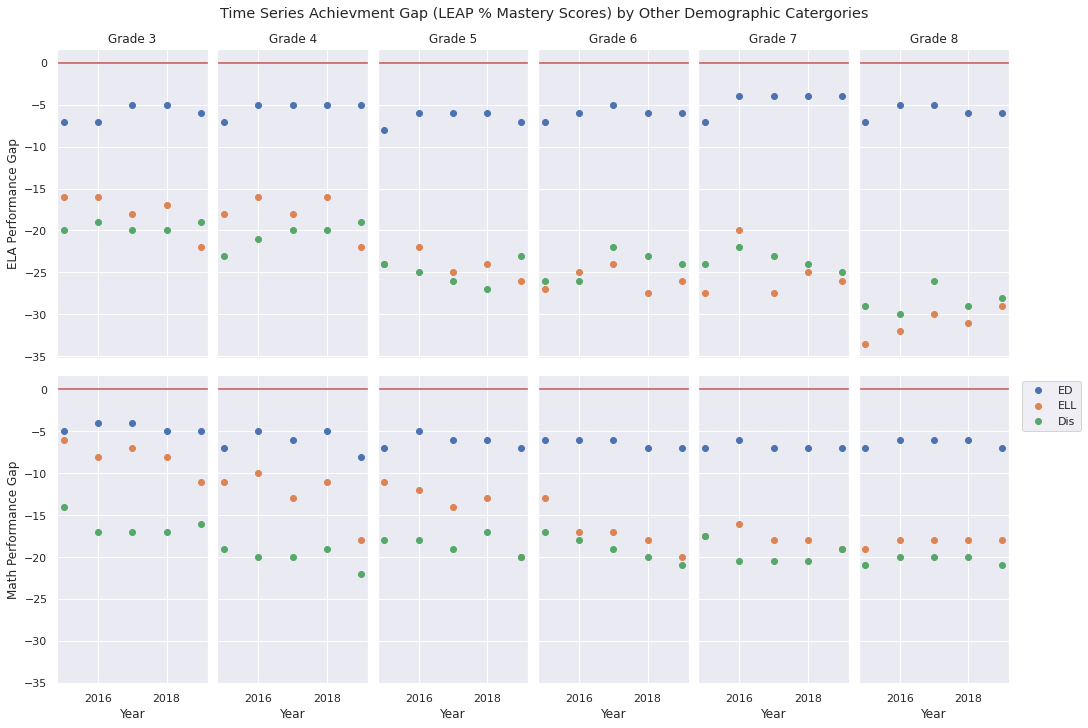

In [82]:
fig, axs = plt.subplots(2, 6, sharex = True, sharey = True, figsize=(15,10), constrained_layout = True)
fig.suptitle('Time Series Achievment Gap (LEAP % Mastery Scores) by Other Demographic Catergories');

# generating ELA y values
for r in otherCat:
  axs[0, 0].scatter(x, yall('Cat', r, 3, 'ELA'), label = r);
for r in otherCat:
  axs[0, 1].scatter(x, yall('Cat', r, 4, 'ELA'), label = r);
for r in otherCat:
  axs[0, 2].scatter(x, yall('Cat', r, 5, 'ELA'), label = r);
for r in otherCat:
  axs[0, 3].scatter(x, yall('Cat', r, 6, 'ELA'), label = r);
for r in otherCat:
  axs[0, 4].scatter(x, yall('Cat', r, 7, 'ELA'), label = r);
for r in otherCat:
  axs[0, 5].scatter(x, yall('Cat', r, 8, 'ELA'), label = r);

# generating Math y values
for r in otherCat:
  axs[1, 0].scatter(x, yall('Cat', r, 3, 'Math'), label = r);
for r in otherCat:
  axs[1, 1].scatter(x, yall('Cat', r, 4, 'Math'), label = r);
for r in otherCat:
  axs[1, 2].scatter(x, yall('Cat', r, 5, 'Math'), label = r);
for r in otherCat:
  axs[1, 3].scatter(x, yall('Cat', r, 6, 'Math'), label = r);
for r in otherCat:
  axs[1, 4].scatter(x, yall('Cat', r, 7, 'Math'), label = r);
for r in otherCat:
  axs[1, 5].scatter(x, yall('Cat', r, 8, 'Math'), label = r);

# add horizonal red line at y = 0
for i in range(0,6):
  axs[0, i].axhline(y = 0, color = 'r', linestyle = '-');
  axs[1, i].axhline(y = 0, color = 'r', linestyle = '-');

# add Grade titles to each subplot column
axs[0,0].title.set_text('Grade 3')
axs[0,1].title.set_text('Grade 4')
axs[0,2].title.set_text('Grade 5')
axs[0,3].title.set_text('Grade 6')
axs[0,4].title.set_text('Grade 7')
axs[0,5].title.set_text('Grade 8')

plt.legend(bbox_to_anchor=(1.05, 1));

for ax in axs.flat:
    ax.set(xlabel='Year')

axs[0,0].set_ylabel('ELA Performance Gap')
axs[1,0].set_ylabel('Math Performance Gap')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Gap Analysis For Vulnerable Subgroups

### General Graph Explanation
*   The red line at zero indicates no achievement gap
*   Points above the line indicate scores are better/higher than those of the total population
*   Points below the line indicate scores are worse/lower than those of the total population
*   Trends over time (2015-2019) are indicated in a single panel
*   Trends across grades (grade 3 - grade 8) are indicated from left to right as you move across the panels in a row
*   "Gap decreases" means points move toward the zero line
*   "Gap increases" means points move away from the zero line (becoming either more positive or more negative)

### ELA

*   Time trends (changes from 2015 to 2019)
    *   ED stays roughly the same over time
    *   ELL grades 3-5 show an increase in the gap over time
    *   ELL grades 6-7 do not show a consistent increase or decrease
    *   ELL grade 8 shows a decrease in the gap
    *   Dis grades 3-5 shows an increase in the gap over time (similar to ELL, but the increase not as dramatic)
    *   Dis grade 6-7 are more variable and do not show a clear time trend
    *   Dis grade 8 shows a gap decrease over time, but the 8th grade scores in 2015 were the lowest scores recorded
*   Trends over grades
    *   ED stays roughly the same over grades 3 through 8
    *   ELL and Dis show a clear increase in gaps from grades 3 to 8

### Math

*   Trends over time
    *   ED stays roughly the same over time
    *   ELL grades 3-6 show an increase in the gap over time (similar to ELA)
    *   ELL grades 7-8 are roughly level over time
    *   Dis grades 3-6 show an increase in the gap over time (simlar to ELL and observed trends in ELA scores)
    *   Dis grades 79 are roughly level over time
*   Trends over grades
    *   ED stays roughly the same over grades 3 through 8
    *   ELL shows clear increase in gap from grades 3 to 8
    *   Dis remain fairly steady over grades 3 through 8

### Conclusions
####Research Question 1: Is the achievement gap in Louisiana closing over time?
While the economically disadvantaged students fall below the line (scoring poorer than the total population), this subgroup scores fairly consistently over time and over grades. The clearest ELA trends in vulnerable subgroups are the widening of the gaps for ELL and Dis students over grades. In lower grades, ELL students perform slightly better than Dis students, but that is reversed for higher grades. There are several possible explanations for this: (1) instruction of ELL students in lower grades is more effective and/or learning language is easier for younger students than older students or (2) difficulty/complexity of LEAP ELA increases at rate greater than students acquire second languages or (3) a large influx/efflux of new ELL students could show greater disparities from the total population. The Math score trend over grade for ELL students might be attributed to the nature of math testing as students age with an increased reliance on word problems and interpretation of text.

Short Answer: No, the achievement gap as measured by LEAP scores is not closing over time. In fact, as students age from grades 3 through 8, the ELA gap is widening for ELL and Dis. The Math gap for ELL is clearly increasing as well.
